# Example 1

This notebook computes event rates and event spectra for a few benchmark models

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import DarkNews as dn
from DarkNews import const

In [3]:
cmd_string = f"dn_gen --exp=miniboone_fhc --neval=10000 --nint=30 --HNLtype=dirac --loglevel=ERROR --seed=42"
const.subprocess_cmd(cmd_string)

dn_gen --exp=miniboone_fhc --neval=10000 --nint=30 --HNLtype=dirac --loglevel=ERROR --seed=42




In [31]:
ud4_def = 1.0
alphaD = 0.25
gD_def = np.sqrt(alphaD*4*np.pi)
umu4_def = np.sqrt(9e-7)
ud4 = 1.
epsilon_def = np.sqrt(2e-10/const.alphaQED)
gen = dn.GenLauncher(mzprime=0.03, m4=0.420, epsilon=epsilon_def, Umu4=umu4_def, UD4=ud4_def, gD=gD_def, 
                    neval=1000, HNLtype="dirac", exp="miniboone_fhc", loglevel='INFO', seed=42)
gen.run()
df = gen.df


---------------------------------------------------------
   ______           _        _   _                     
   |  _  \         | |      | \ | |                    
   | | | |__ _ _ __| | __   |  \| | _____      _____   
   | | | / _  | ___| |/ /   | .   |/ _ \ \ /\ / / __|  
   | |/ / (_| | |  |   <    | |\  |  __/\ V  V /\__ \  
   |___/ \__,_|_|  |_|\_\   \_| \_/\___| \_/\_/ |___/  

---------------------------------------------------------
Model:
	1 dirac heavy neutrino(s).
	kinetically mixed Z'

---------------------------------------------------------
Experiment:
	MiniBooNE_FHC
	fluxfile loaded: ../fluxes/MiniBooNE_FHC.dat
	POT: 1.875e+21
	nuclear targets: ['C12', 'H1']
	fiducial mass: [701.1428571428571, 116.85714285714286] tonnes

Note that the directory tree for this run already exists.
---------------------------------------------------------
Generating Events using the neutrino-nucleus upscattering engine

nu(mu) C12 --> N4  C12 --> nu_light e+ e- C12
Helicity conservin

In [32]:
df_2 = pd.read_pickle('data/miniboone_fhc/3plus1/m4_0.2_mzprime_1.25_dirac/pandas_df.pckl')

In [37]:
print(np.sum(df['w_event_rate']))


12903.909075535918


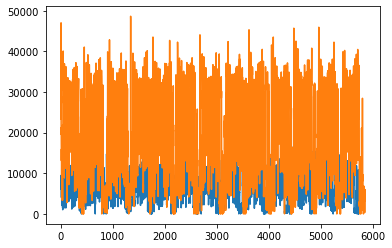

In [19]:
plt.plot(df_d['w_event_rate'])
plt.plot(df_m['w_event_rate'])

plt.plot(df_d['w_event_rate'])
plt.plot(df_m['w_event_rate'])

In [43]:
cmd_string = f"dn_gen --exp=miniboone_fhc --umu5={np.sqrt(1.5e-6):.2g} --umu4={np.sqrt(2.6e-6):.2g} --ud5={np.sqrt(4/11):.2g} --ud4={np.sqrt(7/11):.2g} --chi={np.sqrt(1e-5)} --gD=2 --ud4=0.5 --mzprime=1.25 --m4=0.080 --m5=0.140 --neval=10000 --nint=30 --HNLtype=majorana --loglevel=INFO"
const.subprocess_cmd(cmd_string)

cmd_string = f"dn_gen --exp=miniboone_fhc --umu5={np.sqrt(1.5e-6):.2g} --umu4={np.sqrt(2.6e-6):.2g} --ud5={np.sqrt(4/11):.2g} --ud4={np.sqrt(7/11):.2g} --chi={np.sqrt(1e-5)} --gD=2 --ud4=0.5 --mzprime=1.25 --m4=0.080 --m5=0.140 --neval=10000 --nint=30 --HNLtype=dirac --loglevel=INFO"
const.subprocess_cmd(cmd_string)


# cmd_string = f"dn_gen --exp=miniboone_fhc --umu4={np.sqrt(1e-6):.2g} --ud4={np.sqrt(7/11):.2g} --chi={np.sqrt(5e-6)} --gD=1 --mzprime=1.25 --m4=0.140 --neval=1000 --HNLtype=majorana --loglevel=INFO"
# const.subprocess_cmd(cmd_string)


# cmd_string = f"dn_gen --loglevel=DEBUG --exp=miniboone_fhc --umu4={np.sqrt(9e-7):.2g} --ud4={1} --alpha_epsilon2={2e-10} --alphaD=0.25 --mzprime=0.03 --m4=0.420 --neval=10000 --nint=20 --HNLtype=majorana --loglevel=INFO"
# const.subprocess_cmd(cmd_string)


# cmd_string = f"dn_gen --loglevel=DEBUG --exp=miniboone_fhc --umu4={np.sqrt(9e-7):.2g} --ud4={1} --alpha_epsilon2={2e-10} --alphaD=0.25 --mzprime=0.03 --m4=0.420 --neval=10000 --nint=20 --HNLtype=dirac --loglevel=INFO"
# const.subprocess_cmd(cmd_string)


dn_gen --exp=miniboone_fhc --umu5=0.0012 --umu4=0.0016 --ud5=0.6 --ud4=0.8 --chi=0.0031622776601683794 --gD=2 --ud4=0.5 --mzprime=1.25 --m4=0.080 --m5=0.140 --neval=10000 --nint=30 --D_or_M=majorana --log=INFO


    #########################################################
    #   ______           _        _   _                     #
    #   |  _  \         | |      | \ | |                    #
    #   | | | |__ _ _ __| | __   |  \| | _____      _____   #
    #   | | | / _  | ___| |/ /   | .   |/ _ \ \ /\ / / __|  #
    #   | |/ / (_| | |  |   <    | |\  |  __/\ V  V /\__ \  #
    #   |___/ \__,_|_|  |_|\_\   \_| \_/\___| \_/\_/ |___/  #
    #                                                       #
    #########################################################
    
Theory model used: 3+2 majorana HNL model


Generating helicity conserving upscattering events for:
	nu(mu) + C12 -> N5 +  C12 -> N4 + e+ + e- + C12

decaying N5 using off-shell mediator.
Generating helicity flipping upscatte

In [44]:
df_d = pd.read_pickle('data/miniboone_fhc/3plus2/m5_0.14_m4_0.08_mzprime_1.25_dirac/pandas_df.pckl')
df_m = pd.read_pickle('data/miniboone_fhc/3plus2/m5_0.14_m4_0.08_mzprime_1.25_majorana/pandas_df.pckl')

# df_m = pd.read_pickle('data/miniboone_fhc/3plus1/m4_0.14_mzprime_1.25_majorana/pandas_df.pckl')

# df_d = pd.read_pickle('data/miniboone_fhc/3plus1/m4_0.42_mzprime_0.03_dirac/pandas_df.pckl')
# df_m = pd.read_pickle('data/miniboone_fhc/3plus1/m4_0.42_mzprime_0.03_majorana/pandas_df.pckl')

In [5]:
from DarkNews.GenLauncher import GenLauncher
from DarkNews import const
import numpy as np

ud4_def = 1.0
alphaD = 0.25
gD_def = np.sqrt(alphaD*4*np.pi)
umu4_def = np.sqrt(9e-7)
ud4 = 1.
epsilon_def = np.sqrt(2e-10/const.alphaQED)
gen = GenLauncher(mzprime=0.03, m4=0.420, epsilon=epsilon_def, Umu4=umu4_def, UD4=ud4_def, gD=gD_def, 
                    neval=1000, HNLtype="dirac", exp="miniboone_fhc", loglevel='INFO',
                    parquet=True, numpy=True, hepevt=True, sparse=True, print_to_float32=True)
df = gen.run()
np.sum(df.w_event_rate)

---------------------------------------------------------
   ______           _        _   _                     
   |  _  \         | |      | \ | |                    
   | | | |__ _ _ __| | __   |  \| | _____      _____   
   | | | / _  | ___| |/ /   | .   |/ _ \ \ /\ / / __|  
   | |/ / (_| | |  |   <    | |\  |  __/\ V  V /\__ \  
   |___/ \__,_|_|  |_|\_\   \_| \_/\___| \_/\_/ |___/  

---------------------------------------------------------
Model:
	1 dirac heavy neutrino(s).
	kinetically mixed Z'

---------------------------------------------------------
Experiment:
	MiniBooNE_FHC
	fluxfile loaded: ../fluxes/MiniBooNE_FHC.dat
	POT: 1.875e+21
	nuclear targets: ['C12', 'H1']
	fiducial mass: [701.1428571428571, 116.85714285714286] tonnes

Note that the directory tree for this run already exists.
---------------------------------------------------------
Generating Events using the neutrino-nucleus upscattering engine

nu(mu) C12 --> N4  C12 --> nu_light e+ e- C12
Helicity conservin

/Users/matheushostert/Repos/DarkNews-generator/src/DarkNews/MC.py:247: UserWarning: gammaQ convergence not complete -- want: nan << 1e-05
  logger.debug(f"Vegas results for the integrals: {result.summary()}")


Predicted (931 +/- 37.5) events.

nu(mu) proton_in_H1 --> N4  proton_in_H1 --> nu_light e+ e- proton_in_H1
Helicity flipping upscattering.
N4 decays via on-shell Z'.
Predicted (4.74 +/- 0.189) events.

---------------------------------------------------------
Generation successful

Total events predicted:
(1.32e+04 +/- 405) events.

---------------------------------------------------------
Events in sparse pandas dataframe saved to file successfully:
./data/miniboone_fhc/3plus1/m4_0.42_mzprime_0.03_dirac/

---------------------------------------------------------
Events in sparse pandas dataframe saved to parquet file successfully:
./data/miniboone_fhc/3plus1/m4_0.42_mzprime_0.03_dirac/

---------------------------------------------------------
Events in numpy array saved to file successfully:
./data/miniboone_fhc/3plus1/m4_0.42_mzprime_0.03_dirac/

---------------------------------------------------------
HEPevt events saved to file successfully:
./data/miniboone_fhc/3plus1/m4_0.42_mz

13176.496816602998